# Part 1: Data Loading

In [3]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 2.3 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.1 MB 2.3 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.1 MB 2.3 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.1 MB 2.2 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.1 MB 2.2 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.1 MB 2.3 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.1 MB 2.3 MB/s eta 0:00:04
   ----------------- ---------------------- 4.7/11.1 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.1 MB 2.3 MB/s eta 0:00:03
   -------------------- ------------------- 5.8/11.1 MB 2.4 MB/s eta 0:00:03
   ----------


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Load the california_housing.csv file using pandas

In [4]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame


2. Display the first 5 rows.

In [5]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


3. Print the column names and their data types

In [6]:
df.dtypes


MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

4. Check for missing values in the dataset.

In [7]:
print(df.isnull().sum())


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


5. Get basic statistical summaries using .describe()

In [8]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


 Part 2: Data Cleaning

6. Check for and remove any duplicated rows

In [9]:
# Check how many duplicate rows
print("Duplicate rows before removing:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Check again
print("Duplicate rows after removing:", df.duplicated().sum())


Duplicate rows before removing: 0
Duplicate rows after removing: 0


7. Handle missing values if any:

In [10]:
# Fill missing numerical columns with their mean
df.fillna(df.mean(), inplace=True)


In [13]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Add target column manually
df['target'] = housing.target




8. Create a new column PricePerRoom = median_house_value / total_rooms.


In [14]:
df['PricePerRoom'] = df['target'] / df['AveRooms']


9. Create a column HighPopulationArea:

In [15]:
df['HighPopulationArea'] = df['Population'].apply(lambda x: 1 if x > 500 else 0)


10. Bin the median_income into 5 equal-sized bins

In [16]:
df['IncomeCategory'] = pd.cut(df['MedInc'], 
                              bins=5, 
                              labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

11. Drop columns that seem redundant after feature creation (if any)

In [18]:
df.drop(columns=['AveRooms', 'MedInc'], inplace=True)


In [19]:
df.head()


,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target,PricePerRoom,HighPopulationArea,IncomeCategory
0,41.0,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526,0.648041,0,Medium
1,21.0,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585,0.574691,1,Medium
2,52.0,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521,0.424824,0,Medium
3,52.0,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413,0.586693,1,Low
4,52.0,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422,0.544744,1,Low


🔹Part 3: Data Visualization

In [21]:
!pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 943.7 kB/s eta 0:00:08
   --- ------------------------------------ 0.8/8.1 MB 950.5 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.1 MB 939.1 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.1 MB 939.1 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.1 MB 914.9 kB/s eta 0:00:08
   ------- -------------------------------- 1.6/8.1 MB 907.1 kB/s eta 0:00:08
   --------- ------------------------------ 1.8/8.1 MB 924.0 kB/s eta 0:00:07
   --------- ------------------------------ 1.8/8.1 MB 924.0 kB/s eta 0:00:07
   ---------- ----------------------------- 2.1/8.1 MB 937.3 kB/s eta 0:00:07
   ----------- ---------------------------- 2.4/8.1 MB 926.7 kB/s eta 0:00:07
   ----------


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


12. Plot the distribution of median_house_value with a histogram

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


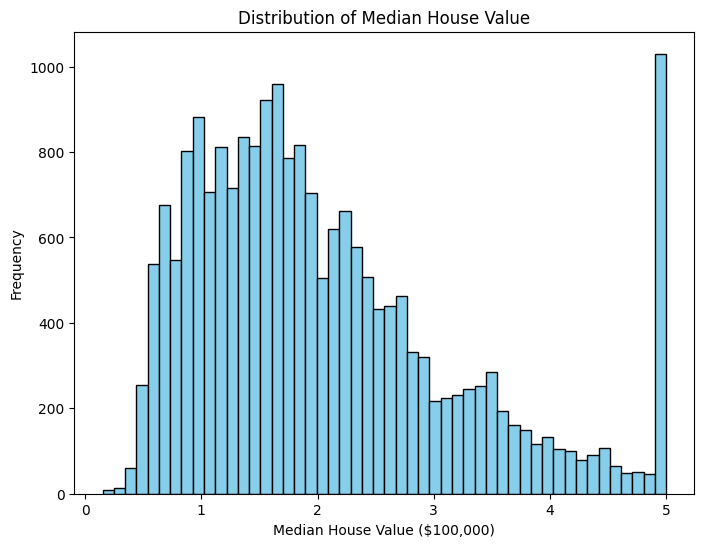

In [23]:
plt.figure(figsize=(8,6))
plt.hist(df['target'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000)')
plt.ylabel('Frequency')
plt.show()


13. Create a scatter plot of longitude vs latitude, colored by median_house_value.

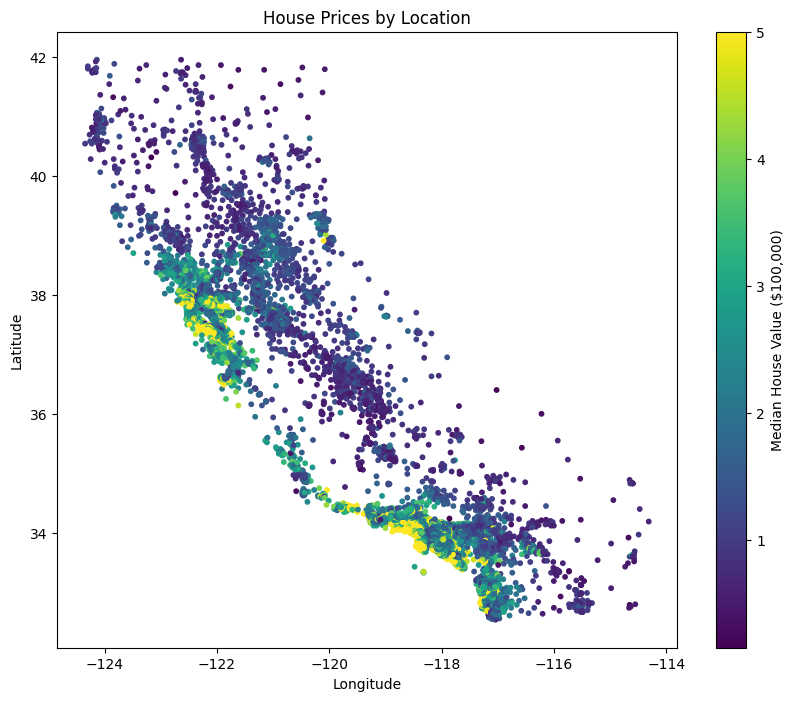

In [24]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                      c=df['target'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Median House Value ($100,000)')
plt.title('House Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


14. Plot a boxplot of median_house_value grouped by the new income categories

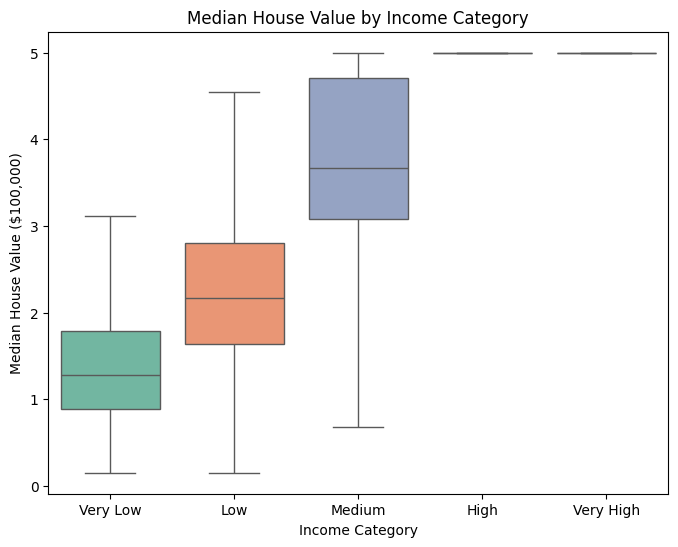

In [29]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, x='IncomeCategory', y='target', hue='IncomeCategory', palette='Set2', showfliers=False)

# Add title and labels
plt.title('Median House Value by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Median House Value ($100,000)')

# Optional: If you want to hide the legend:
# ax.legend(title='Income Category', loc='upper right', frameon=False)

plt.show()






15. Plot the correlation matrix heatmap between numerical features.

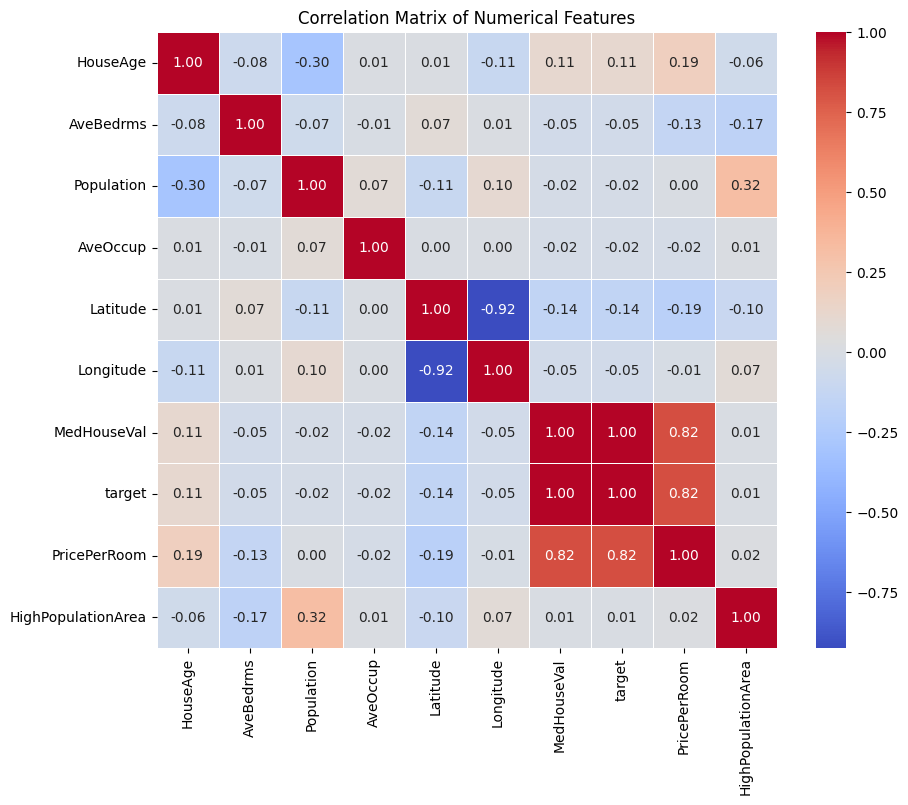

In [31]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()




16. Create a bar plot showing average median_house_value for high population vs low
population areas.

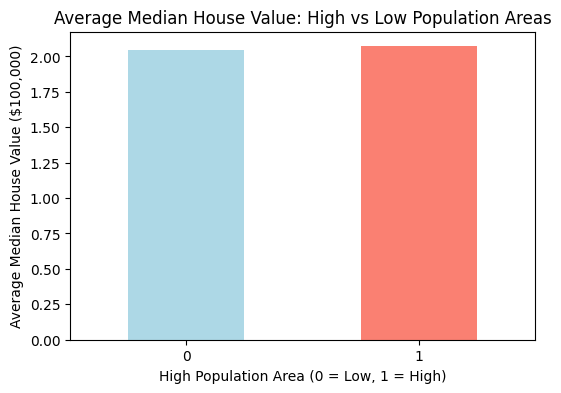

In [32]:
avg_prices = df.groupby('HighPopulationArea')['target'].mean()

plt.figure(figsize=(6,4))
avg_prices.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Average Median House Value: High vs Low Population Areas')
plt.xlabel('High Population Area (0 = Low, 1 = High)')
plt.ylabel('Average Median House Value ($100,000)')
plt.xticks(rotation=0)
plt.show()


Create a pairplot (sns.pairplot) for selected features:


In [34]:
print(df.columns)



Index(['HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'MedHouseVal', 'target', 'PricePerRoom',
       'HighPopulationArea', 'IncomeCategory'],
      dtype='object')


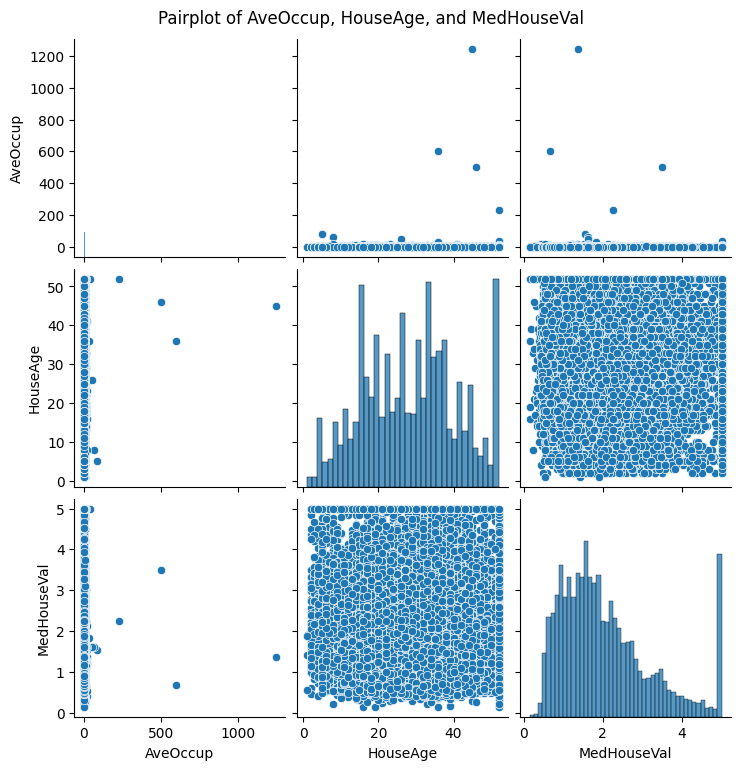

In [40]:
selected_features = df[['AveOccup', 'HouseAge', 'MedHouseVal']]

sns.pairplot(selected_features)
plt.suptitle('Pairplot of AveOccup, HouseAge, and MedHouseVal', y=1.02)
plt.show()


In [43]:
# Save the cleaned dataframe to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'


In [1]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\grace\AppData\Local\Programs\Microsoft VS Code
